In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/bigmarket/bigmarket.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**# checking for missing values****

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

MEAN -> AVERAGE
MODE -> MORE REPEATED VALUE

In [6]:
df['Item_Weight'].mean()

12.857645184135976

# filling missing values in "Item-Weight" with MEAN VALUE

In [7]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [8]:
# Mode of "Outlet_Size" column
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [9]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [10]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [11]:
miss_values = df['Outlet_Size'].isnull()
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [12]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values, 'Outlet_Type'].apply(lambda x:mode_of_Outlet_size[x])
#checking for missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Data Analysis**

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**# Item_Weight distribution**


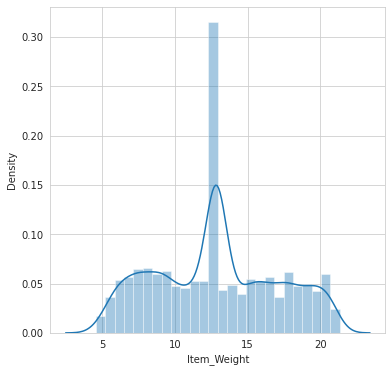

In [14]:

plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

**# Item Visibility distribution**

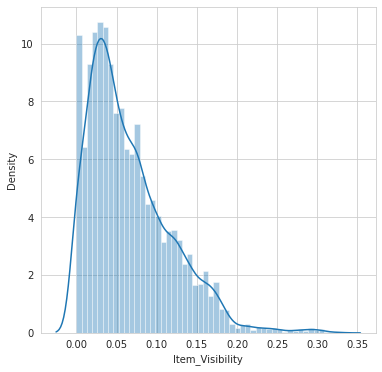

In [15]:

plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

**# Item MRP distribution**

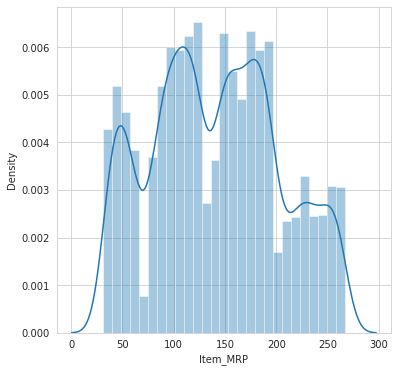

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

# Item_Outlet_Sales distribution

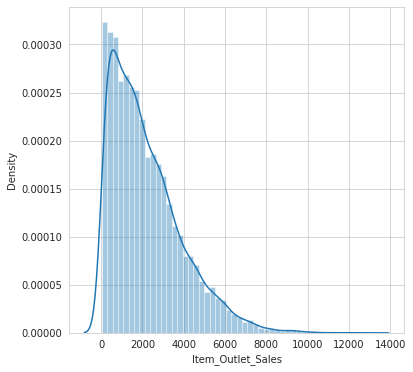

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

**# Outlet_Establishment_Year column**

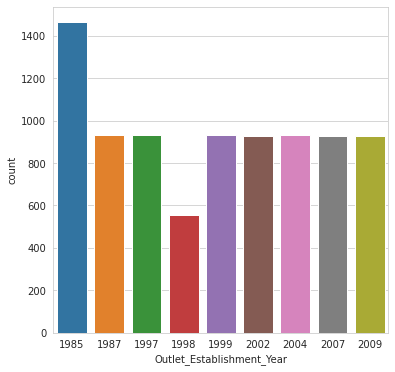

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

**# Item_Fat_Content column**

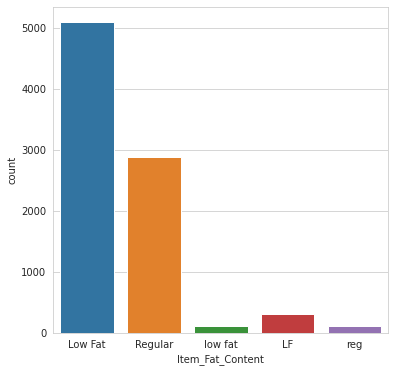

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

**# Item_Type column**

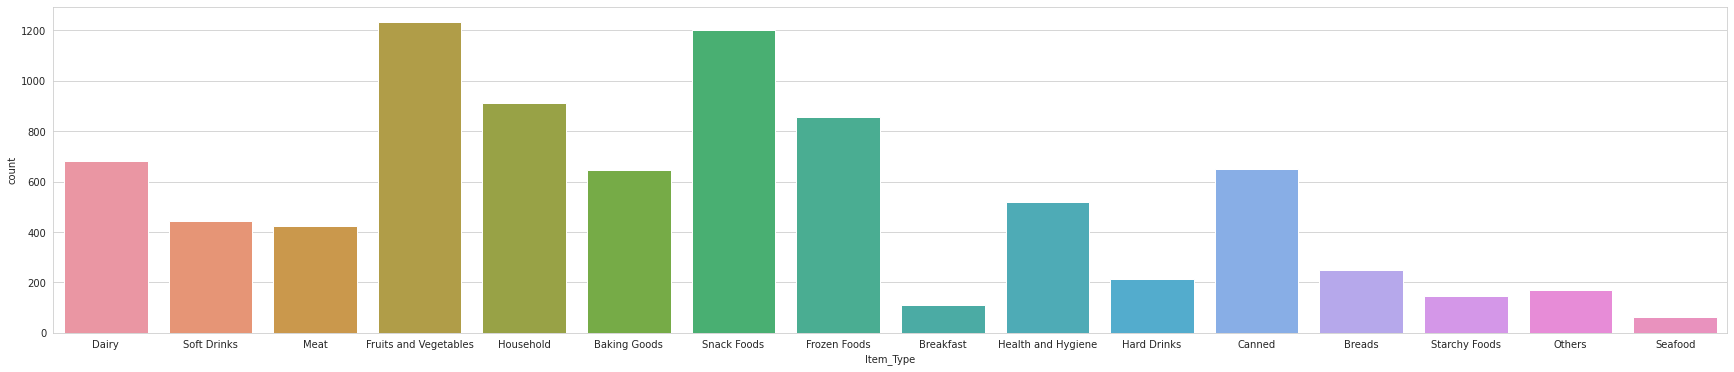

In [20]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

**# Outlet_Size column**

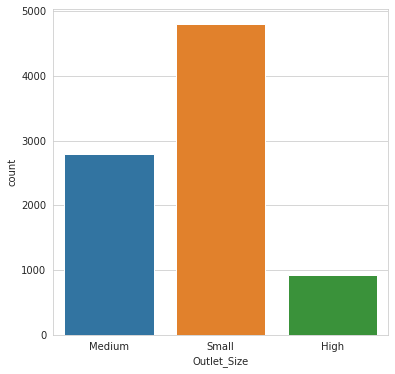

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

**Data Pre=Processing**

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}},inplace=True)

In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Label Encoding**

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
encoder = LabelEncoder()

In [28]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**Splitting features and Target**

In [30]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [31]:
print(X)

[[1.560e+02 9.300e+00 0.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [8.000e+00 5.920e+00 1.000e+00 ... 1.000e+00 2.000e+00 2.000e+00]
 [6.620e+02 1.750e+01 0.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 ...
 [1.357e+03 1.060e+01 0.000e+00 ... 2.000e+00 1.000e+00 1.000e+00]
 [6.810e+02 7.210e+00 1.000e+00 ... 1.000e+00 2.000e+00 2.000e+00]
 [5.000e+01 1.480e+01 0.000e+00 ... 2.000e+00 0.000e+00 1.000e+00]]


In [32]:
print(y)

[3735.138   443.4228 2097.27   ... 1193.1136 1845.5976  765.67  ]


**Splitting into Train Test Split**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


**Training Algortihm**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model = Sequential()

model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))

model.add(Dense(1)) # output layer

model.compile(optimizer='rmsprop', loss='mse')

2022-04-28 11:03:11.854496: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [37]:
model.fit(x = X_train, y = y_train, epochs=50)

2022-04-28 11:03:12.164429: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
214/214 [==============================] - 1s 2ms/step - loss: 4268256.0000
Epoch 2/50
214/214 [==============================] - 0s 2ms/step - loss: 2831244.2500
Epoch 3/50
214/214 [==============================] - 0s 2ms/step - loss: 2694904.0000
Epoch 4/50
214/214 [==============================] - 0s 2ms/step - loss: 2503776.5000
Epoch 5/50
214/214 [==============================] - 0s 2ms/step - loss: 2236713.2500
Epoch 6/50
214/214 [==============================] - 0s 2ms/step - loss: 2025817.8750
Epoch 7/50
214/214 [==============================] - 0s 2ms/step - loss: 1954203.3750
Epoch 8/50
214/214 [==============================] - 0s 2ms/step - loss: 1931962.6250
Epoch 9/50
214/214 [==============================] - 0s 2ms/step - loss: 1920372.3750
Epoch 10/50
214/214 [==============================] - 0s 2ms/step - loss: 1915666.0000
Epoch 11/50
214/214 [==============================] - 0s 2ms/step - loss: 1908297.0000
Epoch 12/50
214/214 [====================

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [39]:
loss_df = pd.DataFrame(model.history.history)

In [40]:
loss_df

,loss
0,4268256.000
1,2831244.250
2,2694904.000
3,2503776.500
4,2236713.250
5,2025817.875
6,1954203.375
7,1931962.625
8,1920372.375
9,1915666.000


<AxesSubplot:>

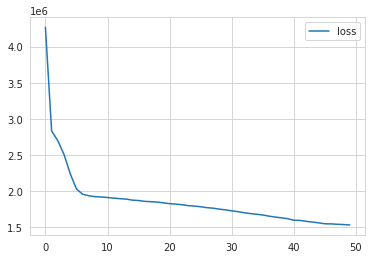

In [41]:
loss_df.plot()

**Model Evaluation**

In [42]:

test_eval = model.evaluate(X_test, y_test, verbose=0)
print(test_eval)

1591096.25


**# model evaluation on train set**

In [43]:
train_eval = model.evaluate(X_train, y_train, verbose=0)
print(train_eval)

1596897.75


**# Checking difference between train_eval and test_eval**

In [44]:
model_diff = train_eval - test_eval
print(model_diff)

5801.5


**# Train prediction on test data**

In [45]:
train_prediction = model.predict(X_train)

**# Test prediction on test data**

In [46]:
test_prediction = model.predict(X_test)

In [47]:
print(train_prediction)

[[2647.918  ]
 [ 673.0176 ]
 [ 670.96826]
 ...
 [ 805.0281 ]
 [1562.1196 ]
 [2929.8635 ]]


In [48]:
print(test_prediction)

[[2104.4558 ]
 [1590.8557 ]
 [1024.7468 ]
 ...
 [3670.7898 ]
 [ 195.01709]
 [4680.941  ]]


**# R Squared : R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 –**

In [49]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, train_prediction)

In [50]:
print('R squared value of train data:', r2_train)

R squared value of train data: 0.45086162528405027


In [51]:
r2_test = r2_score(y_test, test_prediction)

In [52]:
print('R squared value of test data:',r2_test)

R squared value of test data: 0.4563809007260504
